In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the Fashion MNIST dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# Pictures are in 28x28. Pixel intensities are between 0 and 255
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
# Need a validation set.
# Gradient descent performs better with scaled features, so we bring range between 0 and 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [5]:
# Write out the class names so it's easier to identify
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
class_names[y_train[0]]

'Coat'

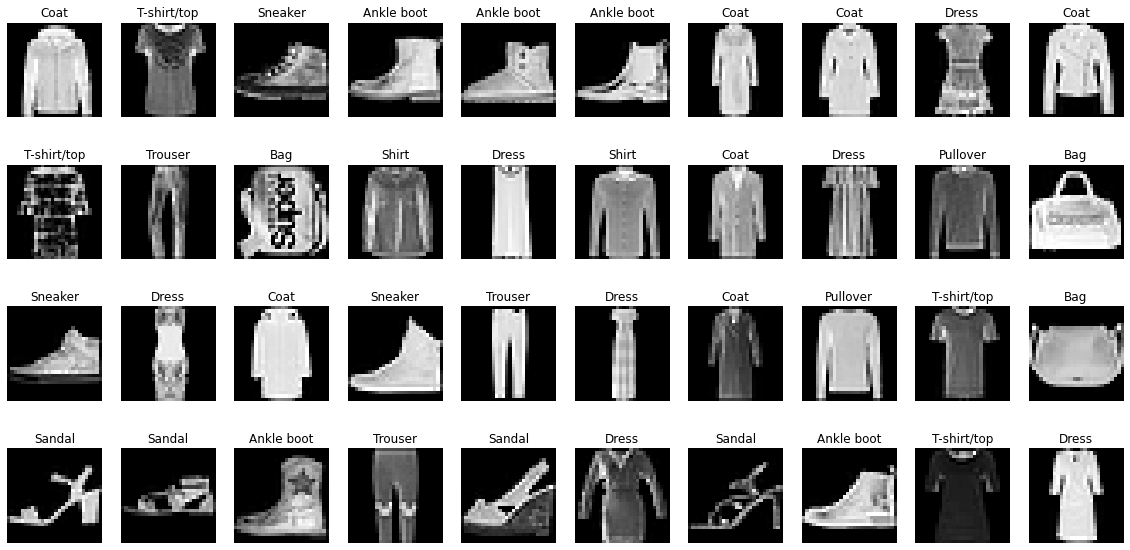

In [7]:
# Look at a sample of the data
plt.figure(figsize = (20,10))
for ii in range(40):
    ax = plt.subplot(4, 10, ii+1)
    plt.imshow(X_train[ii], cmap = 'gray')
    plt.title(class_names[y_train[ii]])
    plt.axis('off')

In [8]:
# Model Structure
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [9]:
# Used to check summary of the model including output sizes and number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


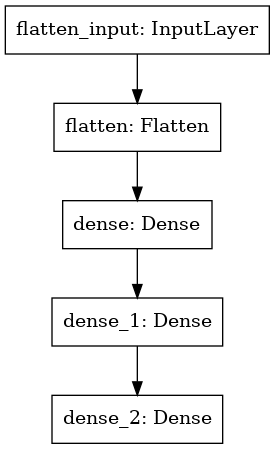

In [10]:
# Used for getting a visual representation of the model
# Also creates a png
keras.utils.plot_model(model)

In [11]:
# Check list of layers
model.layers

In [12]:
# Check the names of the layers
[layer.name for layer in model.layers]

['flatten', 'dense', 'dense_1', 'dense_2']

In [13]:
# You can retrieve a layer by name or index
print(model.layers[1])
print(model.get_layer('dense'))

In [14]:
# Weights and bias terms can be accessed for a layer
hidden1 = model.layers[1]

weights, biases = hidden1.get_weights()

In [15]:
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.0514888   0.02184981 -0.03095013 ... -0.02585404 -0.01824769
  -0.05782565]
 [ 0.06875354  0.06804781  0.05119923 ... -0.03148597 -0.04224962
  -0.00635526]
 [-0.05024754 -0.01059855 -0.06351791 ... -0.00848982  0.07042143
   0.01956159]
 ...
 [ 0.05002069 -0.05060734 -0.03867288 ... -0.0325093  -0.03265922
  -0.06472041]
 [-0.01812147  0.06833932  0.00071313 ...  0.07143687  0.00399506
   0.06271575]
 [ 0.07367055  0.0142416  -0.06323992 ... -0.01235725 -0.05281302
   0.06786281]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [16]:
# Compile the model before it can run
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [17]:
# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs = 30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7128 - accuracy: 0.7645 - val_loss: 0.5184 - val_accuracy: 0.8236
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4877 - accuracy: 0.8319 - val_loss: 0.4805 - val_accuracy: 0.8236
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4448 - accuracy: 0.8430 - val_loss: 0.4102 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4173 - accuracy: 0.8536 - val_loss: 0.3900 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3966 - accuracy: 0.8597 - val_loss: 0.3745 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3802 - accuracy: 0.8653 - val_loss: 0.3795 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3677 - accuracy: 0.8704 - val_loss: 0.3732 - val_accuracy:

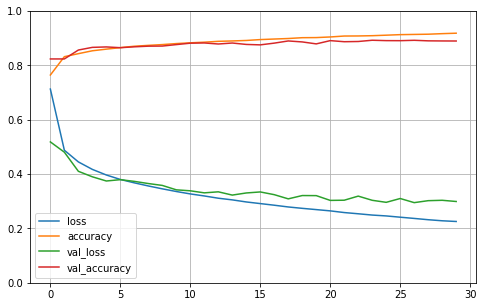

In [18]:
# Plot the history of the training
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
# Evaluate the model - ONCE YOU ARE HAPPY WITH VALIDATION SCORE AND NOT BEFORE!!!
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 74.5356 - accuracy: 0.8311


[74.53562927246094, 0.8310999870300293]

In [20]:
# Making predictions on the test set and seeing probabilities
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
# Making predictions on the test set and seeing class assignment
y_pred = np.argmax(model.predict(X_new), axis = 1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

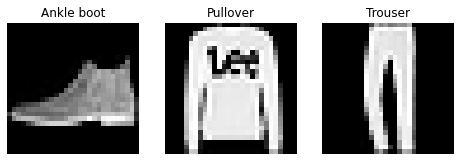

In [22]:
# Check the pictures and the predictions it made
plt.figure(figsize = (8,24))
for ii in range(3):
    ax = plt.subplot(1,3, ii+1)
    plt.imshow(X_new[ii], cmap = 'gray')
    plt.title(np.array(class_names)[y_pred][ii])
    plt.axis('off')

In [23]:
# Save the model
model.save('Fashion_mnist.h5')

# TensorBoard Example

In [24]:
import os

In [25]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [26]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H-%M-%S")
    return os.path.join(root_logdir, run_id)

In [28]:
run_logdir = get_run_logdir()

In [29]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Fashion_mnist.h5", 
                                                save_only_best = True)
early_stopping = keras.callbacks.EarlyStopping(patience = 10,
                                               restore_best_weights = True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,
                    y_train,
                    epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2201 - accuracy: 0.9219 - val_loss: 0.2911 - val_accuracy: 0.8960
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2176 - accuracy: 0.9222 - val_loss: 0.3070 - val_accuracy: 0.8892
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2134 - accuracy: 0.9229 - val_loss: 0.2965 - val_accuracy: 0.8926
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2098 - accuracy: 0.9246 - val_loss: 0.2994 - val_accuracy: 0.8926
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2067 - accuracy: 0.9260 - val_loss: 0.2921 - val_accuracy: 0.8980
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2032 - accuracy: 0.9265 - val_loss: 0.2942 - val_accuracy: 0.8968
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2011 - accuracy: 0.9280 - val_loss: 0.2876 - val_ac